In [15]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("My Drive/10X/Week1/clean_df.csv")
dftel = df[df['Handset Type'] != 'undefined']
dftel.head()

,Unnamed: 0,Bearer Id,Start,End,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),...,Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Total Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Other Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes)
0,9,-9223372036854775808,2019-04-15 00:32:00,2019-04-25 00:40:00,864482,208200314385130,33659219748,35573109931422,L20434C,97.0,...,22417975.0,850570347.0,1585413,872988322.0,8778341,766046.0,77671250.0,22911539.0,13185350.0,812946425.0
1,11,-9223372036854775808,2019-04-15 11:33:00,2019-04-25 18:44:00,889834,208201908306215,33664473872,86009102759374,T21335C,217.0,...,33691738.0,535118044.0,839351,568809782.0,8822396,2348652.0,538369717.0,19623308.0,20124838.0,505668618.0
2,14,-9223372036854775808,2019-04-16 00:35:00,2019-04-25 00:40:00,777887,208200314385130,33659219748,35573109931422,L20434C,79.0,...,32480400.0,298662697.0,2480347,331143097.0,7991932,3672362.0,50438697.0,25308492.0,26233613.0,255096405.0
3,15,7277825621540039680,2019-04-16 08:56:00,2019-04-25 09:44:00,780471,208201716888047,33753758738,35573009195619,T88606B,39.0,...,58387271.0,42659750.0,2066962,101047021.0,6491896,2653810.0,152500509.0,26558004.0,5557753.0,42366688.0
4,20,-9223372036854775808,2019-04-17 00:35:00,2019-04-25 04:52:00,706649,208201008643031,33658752999,86540802106829,T29714B,409.0,...,26026033.0,422406937.0,3193807,448432970.0,10756348,1044493.0,161491704.0,25470580.0,33305076.0,374527977.0


## Data description

In [17]:
dftel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18618 entries, 0 to 19496
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        18618 non-null  int64  
 1   Bearer Id                         18618 non-null  int64  
 2   Start                             18618 non-null  object 
 3   End                               18618 non-null  object 
 4   Dur (s)                           18618 non-null  int64  
 5   IMSI                              18618 non-null  int64  
 6   MSISDN/Number                     18618 non-null  int64  
 7   IMEI                              18618 non-null  int64  
 8   Last Location Name                18618 non-null  object 
 9   Avg RTT DL (ms)                   18618 non-null  float64
 10  Avg RTT UL (ms)                   18618 non-null  float64
 11  Avg Bearer TP DL (kbps)           18618 non-null  int64  
 12  Avg 

In [18]:
dftel.describe()

,Unnamed: 0,Bearer Id,Dur (s),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Total Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Other Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes)
count,18618.000000,1.861800e+04,1.861800e+04,1.861800e+04,1.861800e+04,1.861800e+04,18618.000000,18618.000000,18618.000000,18618.000000,...,1.861800e+04,1.861800e+04,1.861800e+04,1.861800e+04,1.861800e+04,1.861800e+04,1.861800e+04,1.861800e+04,1.861800e+04,1.861800e+04
mean,15441.990278,-1.347192e+18,5.549156e+04,2.082016e+14,3.367441e+10,5.177465e+13,170.804759,20.551348,25750.896659,3059.167365,...,4.109018e+07,4.536400e+08,1.826311e+06,4.947301e+08,7.818563e+06,2.255404e+06,4.275737e+08,2.264836e+07,2.268554e+07,4.291995e+08
std,10450.886076,8.215006e+18,5.949683e+04,1.214360e+09,4.457908e+07,2.415328e+13,674.093757,76.572094,27037.810148,5528.153106,...,1.125952e+07,2.446023e+08,1.032388e+06,2.448968e+08,3.517897e+06,1.075448e+06,2.420893e+08,9.243676e+06,9.203108e+06,2.444529e+08
min,9.000000,-9.223372e+18,7.142000e+03,2.082001e+14,3.360101e+10,1.202701e+12,11.000000,0.000000,0.000000,0.000000,...,6.111724e+06,7.114041e+06,7.503000e+03,3.109335e+07,1.126740e+05,1.817600e+04,1.477860e+06,2.381900e+05,2.749270e+05,1.180903e+06
25%,6694.250000,-9.223372e+18,2.019450e+04,2.082014e+14,3.365200e+10,3.551591e+13,40.000000,4.000000,4183.000000,395.000000,...,3.308302e+07,2.427314e+08,9.353540e+05,2.837251e+08,4.943620e+06,1.354673e+06,2.167322e+08,1.604501e+07,1.603930e+07,2.180678e+08
50%,14305.500000,-9.223372e+18,3.410550e+04,2.082015e+14,3.366371e+10,3.578101e+13,55.000000,8.000000,18697.000000,1019.500000,...,4.107079e+07,4.545917e+08,1.821480e+06,4.962813e+08,7.875709e+06,2.256465e+06,4.289437e+08,2.268209e+07,2.275812e+07,4.303051e+08
75%,22189.500000,7.277826e+18,8.639900e+04,2.082018e+14,3.368169e+10,8.637690e+13,98.000000,21.000000,38388.500000,2667.750000,...,4.899630e+07,6.666496e+08,2.720612e+06,7.073706e+08,1.069405e+07,3.166632e+06,6.365560e+08,2.933268e+07,2.928802e+07,6.425105e+08
max,36784.000000,7.421941e+18,1.015143e+06,2.082099e+14,3.379000e+10,9.900120e+13,26971.000000,7120.000000,251416.000000,57792.000000,...,7.833131e+07,8.956818e+08,3.647700e+06,9.495983e+08,1.550645e+07,4.490567e+06,8.590537e+08,4.517004e+07,4.498365e+07,8.589021e+08


In [19]:
# correlation
dftel.corr()

,Unnamed: 0,Bearer Id,Dur (s),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Total Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Other Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes)
Unnamed: 0,1.000000,0.015332,0.119895,-0.013199,-0.005350,-0.029866,0.011040,0.000829,-0.046679,-0.042391,...,0.013221,0.006084,0.005191,0.006684,-0.005256,-0.007079,-0.005521,0.008713,0.015986,0.006015
Bearer Id,0.015332,1.000000,-0.078140,0.020322,-0.023381,-0.150013,0.037769,-0.033710,-0.044388,-0.024437,...,0.003804,-0.008329,-0.011882,-0.008144,0.010758,0.000616,-0.010436,-0.010140,0.002179,-0.008046
Dur (s),0.119895,-0.078140,1.000000,0.032734,0.027199,0.232232,-0.049705,0.041382,0.139711,0.102062,...,-0.006560,-0.002959,-0.000234,-0.003257,-0.003875,0.001510,-0.003167,-0.003995,0.001475,-0.003313
IMSI,-0.013199,0.020322,0.032734,1.000000,0.029846,0.029427,-0.006464,0.000417,-0.006149,0.003410,...,-0.002511,-0.003486,0.004815,-0.003597,-0.002275,0.002554,-0.001033,-0.004690,0.003164,-0.003671
MSISDN/Number,-0.005350,-0.023381,0.027199,0.029846,1.000000,0.058272,0.004798,0.012805,0.031002,0.046290,...,0.002116,-0.008423,0.005244,-0.008315,-0.000414,0.012814,0.000056,-0.003196,0.000332,-0.008358
IMEI,-0.029866,-0.150013,0.232232,0.029427,0.058272,1.000000,-0.042215,0.094571,0.142765,0.126465,...,0.000844,0.002527,0.004239,0.002563,-0.007217,-0.005573,0.007321,-0.000975,-0.002996,0.002465
Avg RTT DL (ms),0.011040,0.037769,-0.049705,-0.006464,0.004798,-0.042215,1.000000,0.010838,-0.112665,-0.061767,...,-0.005547,-0.012584,-0.004125,-0.012824,0.001449,-0.002222,-0.003921,0.000539,-0.013246,-0.012514
Avg RTT UL (ms),0.000829,-0.033710,0.041382,0.000417,0.012805,0.094571,0.010838,1.000000,0.011717,0.017811,...,-0.011682,0.006830,0.005995,0.006285,0.006826,0.000422,0.020969,-0.013003,-0.002119,0.006733
Avg Bearer TP DL (kbps),-0.046679,-0.044388,0.139711,-0.006149,0.031002,0.142765,-0.112665,0.011717,1.000000,0.420840,...,0.007166,0.001558,-0.008713,0.001886,-0.007966,0.008152,0.007459,-0.006302,0.002493,0.001878
Avg Bearer TP UL (kbps),-0.042391,-0.024437,0.102062,0.003410,0.046290,0.126465,-0.061767,0.017811,0.420840,1.000000,...,-0.000249,0.001751,0.003519,0.001737,-0.001196,0.001921,0.001875,0.006234,0.002287,0.001389


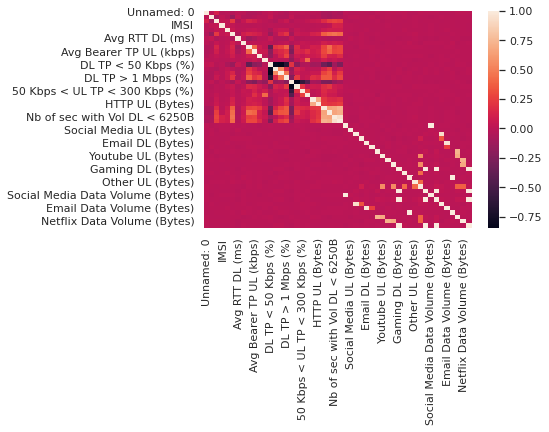

In [20]:
# correlation plot, use only relevant columns
sns.heatmap(dftel.corr())

## Top 10 handsets used by the customers

Top 10 handsets used: 
 Huawei B528S-23A                3198
Apple iPhone 6 (A1586)           961
Apple iPhone 6S (A1688)          809
Apple iPhone 7 (A1778)           765
Samsung Galaxy S8 (Sm-G950F)     517
Apple iPhone 8 (A1905)           483
Apple iPhone Se (A1723)          459
Apple iPhone X (A1901)           395
Samsung Galaxy S7 (Sm-G930X)     386
Huawei E5180                     378
Name: Handset Type, dtype: int64 



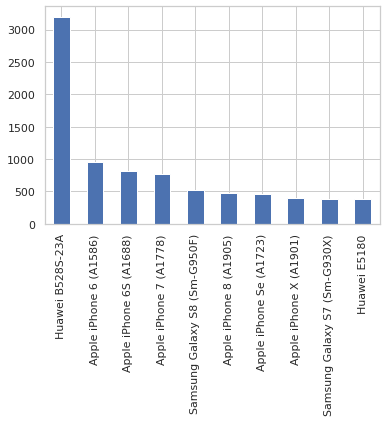

In [21]:
sns.set_theme(style="whitegrid")
top_10_handsets = dftel['Handset Type'].value_counts()[:10]
print("Top 10 handsets used: \n", top_10_handsets, "\n")
top_10_handsets.plot(kind='bar')

## Top 3 handset manufacturers



Top 3 manufacturers: 
 Apple      6128
Huawei     5478
Samsung    4965
Name: Handset Manufacturer, dtype: int64 



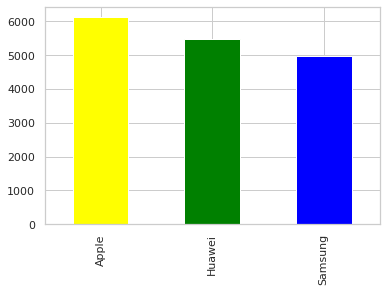

In [22]:
top_3_manf = dftel['Handset Manufacturer'].value_counts()
print("\n\nTop 3 manufacturers: \n", top_3_manf.head(3), '\n')
top_3_manf.head(3).plot(kind='bar', color=['yellow', 'green', 'blue'])

## Top 5 handsets per top 3 manufacturers

In [23]:
top_3 = dftel[dftel["Handset Manufacturer"].isin(top_3_manf.head(3).index.tolist())]
top_sets = top_3['Handset Type'].groupby(dftel['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))
top_sets

Handset Manufacturer                                   
Apple                 Apple iPhone 6 (A1586)                961
                      Apple iPhone 6S (A1688)               809
                      Apple iPhone 7 (A1778)                765
                      Apple iPhone 8 (A1905)                483
                      Apple iPhone Se (A1723)               459
Huawei                Huawei B528S-23A                     3198
                      Huawei E5180                          378
                      Huawei P8 Lite                        186
                      Huawei P20 Lite Huawei Nova 3E        171
                      Huawei P20                            158
Samsung               Samsung Galaxy S8 (Sm-G950F)          517
                      Samsung Galaxy S7 (Sm-G930X)          386
                      Samsung Galaxy A5 Sm-A520F            333
                      Samsung Galaxy J3 (Sm-J330)           288
                      Samsung Galaxy S7 Edge (Sm

## Number of xDR sessions of per user

In [24]:
imei_per_session = dftel.groupby('MSISDN/Number')['IMEI'].agg('count').reset_index(name='Bearer Id')
imei_per_session.sort_values(by='Bearer Id',
        ascending=False)
imei_per_session

,MSISDN/Number,Bearer Id
0,33601008617,1
1,33601047438,1
2,33601062786,1
3,33601070798,1
4,33601072539,1
...,...,...
17788,33789649244,1
17789,33789650572,1
17790,33789781631,1
17791,33789914536,1


## Average Session Duration Per User

In [25]:
user_duration = dftel.groupby('MSISDN/Number').agg({'Dur (s)': 'mean'})
user_duration.rename(columns={'Dur (s)': 'Average duration (s)'}, inplace=True)
user_duration.head()

,Average duration (s)
MSISDN/Number,
33601008617,18555.0
33601047438,31778.0
33601062786,10532.0
33601070798,12842.0
33601072539,32737.0


In [26]:
dftel.columns.tolist()

['Unnamed: 0',
 'Bearer Id',
 'Start',
 'End',
 'Dur (s)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',


## Total Upload And Download Per User

In [31]:
total_data_volume = dftel.groupby('MSISDN/Number')[['Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_data_volume

,Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,
33601008617,55799100.0,816033480.0,871832580.0
33601047438,53507118.0,196933890.0,250441008.0
33601062786,25261489.0,744454744.0,769716233.0
33601070798,36001709.0,656596751.0,692598460.0
33601072539,46995796.0,326710490.0,373706286.0
...,...,...,...
33789649244,56214261.0,605522603.0,661736864.0
33789650572,41997954.0,368445488.0,410443442.0
33789781631,41925820.0,228998600.0,270924420.0


## Total Data Volume For Each Application For Each User

In [32]:
total_app_volume = dftel.groupby('MSISDN/Number')[['Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Social Media Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)']].sum()
total_app_volume

,Google Data Volume (Bytes),Email Data Volume (Bytes),Social Media Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
MSISDN/Number,,,,,,,
33601008617,10170635,1413685.0,1524057,20492482.0,21973110.0,802565189.0,85988660.0
33601047438,6505532,2859569.0,207352,36938691.0,27713294.0,164342676.0,510899047.0
33601062786,5032487,2104404.0,2186275,10683217.0,36026341.0,708855040.0,354876626.0
33601070798,7475575,2968665.0,982717,24903986.0,14777307.0,637463946.0,299028176.0
33601072539,6713895,2271820.0,3327033,21002980.0,15847618.0,311150719.0,82938064.0
...,...,...,...,...,...,...,...
33789649244,864562,3759965.0,2031571,18819092.0,26142000.0,602650858.0,761436211.0
33789650572,6209804,931869.0,644745,25944933.0,11711523.0,348775584.0,478998314.0
33789781631,6503937,2308238.0,841716,23796674.0,37594078.0,193297632.0,332575821.0
